In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Preprocessing
X = pd.read_csv('CreditCard_data.csv') 
  
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
X.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# Scaling the data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

In [7]:
type(X_normalized)

numpy.ndarray

In [8]:
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [9]:
X_normalized.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


### PCA (Principal Component Analysis)
## for large no of data we use PCA
- It is a statistical procedure that uses an (orthogonal) transformation which converts a set of correlated variables to a set of uncorrelated variables. 
- It is  widely used tool in exploratory data analysis and in ML for predictive models
- is an unsupervised statistical technique used to examine the interrelations among a set of variables

In [10]:
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

In [11]:
X_principal.head(5)

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268882
3,-0.481656,-0.097608
4,-0.563512,-0.482506


In [12]:
ac2 = AgglomerativeClustering(n_clusters = 2) 

y_pred2 = ac2.fit_predict(X_principal)

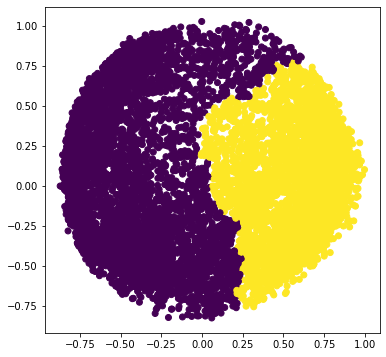

In [13]:
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred2) #, cmap ='rainbow'
plt.show() 

In [14]:
ac3 = AgglomerativeClustering(n_clusters = 3) 

y_pred3 = ac3.fit_predict(X_principal)

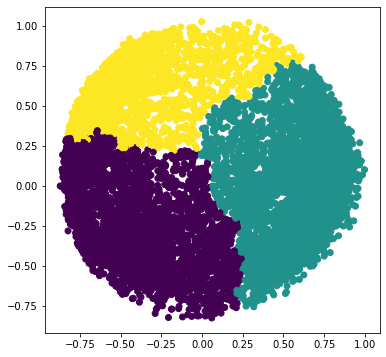

In [15]:
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred3) #, cmap ='rainbow'
plt.show() 

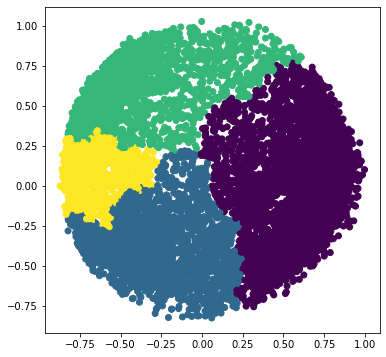

In [16]:
ac4 = AgglomerativeClustering(n_clusters = 4) 

y_pred4 = ac4.fit_predict(X_principal)

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred4) #, cmap ='rainbow'
plt.show() 

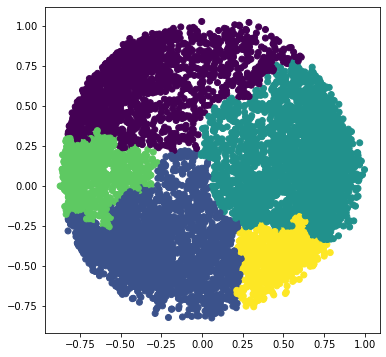

In [17]:
ac5 = AgglomerativeClustering(n_clusters = 5) 

y_pred5 = ac5.fit_predict(X_principal)

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred5) #, cmap ='rainbow'
plt.show() 

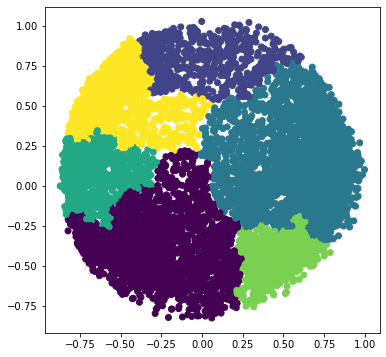

In [18]:
ac6 = AgglomerativeClustering(n_clusters = 6) 

y_pred6 = ac6.fit_predict(X_principal)

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = y_pred6) #, cmap ='rainbow'
plt.show() 

### Silhouette score

Supervised algorithms have metrics to check their goodness of fit like accuracy, r-square value, sensitivity, etc. 
- But, how to calculate to measure the accuracy or goodness of our clustering technique --> So, 
Silhouette score is used.

Silhouette score is a metric used to calculate the goodness of a clustering technique. 
Its value ranges from -1 to 1.

 - 1: Means clusters are well apart from each other and clearly distinguished

 - 0: Means clusters are indifferent (i.e.the distance between clusters is not significant)

 - -1: Means clusters are assigned in the wrong way
 
 

In [19]:
from sklearn.metrics import silhouette_score 

In [20]:
k = [2, 3, 4, 5, 6] 
sil_scores = [] 

In [21]:
sil_scores.append(silhouette_score(X_principal, y_pred2)) 
sil_scores.append(silhouette_score(X_principal, y_pred3)) 
sil_scores.append(silhouette_score(X_principal, y_pred4)) 
sil_scores.append(silhouette_score(X_principal, y_pred5)) 
sil_scores.append(silhouette_score(X_principal, y_pred6)) 
 

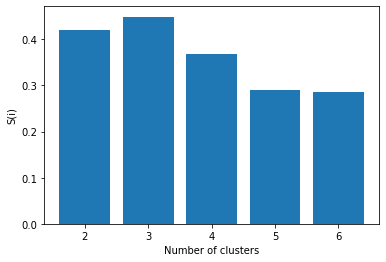

In [22]:
# Plotting a bar graph to compare the results 
plt.bar(k, sil_scores) 
plt.xlabel('Number of clusters') #, fontsize = 18) 
plt.ylabel('S(i)') #, fontsize = 18) 
plt.show() 

 Based on bar graph,  the optimal number of clusters for the given data and clustering technique is 3

In [24]:
import scipy.cluster.hierarchy as shc 

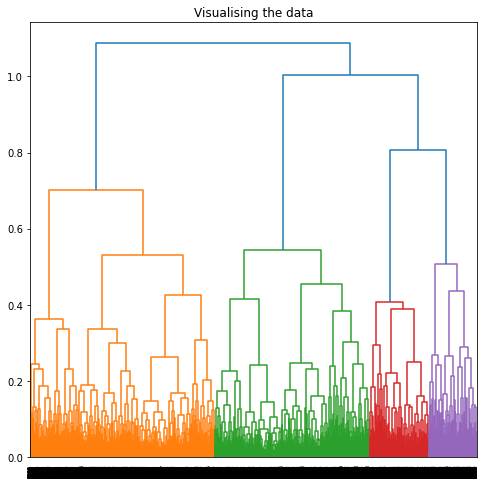

In [25]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='average' )))  #method ='ward'
# The drawback of dendogram is that is took a lot of cpu computational power.